In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 01_District_wise_crimes_committed_IPC_2001_2012.csv to 01_District_wise_crimes_committed_IPC_2001_2012.csv
Saving 01_District_wise_crimes_committed_IPC_2013.csv to 01_District_wise_crimes_committed_IPC_2013.csv
Saving 01_District_wise_crimes_committed_IPC_2014.csv to 01_District_wise_crimes_committed_IPC_2014.csv
Saving 02_01_District_wise_crimes_committed_against_SC_2001_2012.csv to 02_01_District_wise_crimes_committed_against_SC_2001_2012.csv
Saving 02_01_District_wise_crimes_committed_against_SC_2013.csv to 02_01_District_wise_crimes_committed_against_SC_2013.csv
Saving 02_01_District_wise_crimes_committed_against_SC_2014.csv to 02_01_District_wise_crimes_committed_against_SC_2014.csv
Saving 02_District_wise_crimes_committed_against_ST_2001_2012.csv to 02_District_wise_crimes_committed_against_ST_2001_2012.csv
Saving 02_District_wise_crimes_committed_against_ST_2013.csv to 02_District_wise_crimes_committed_against_ST_2013.csv
Saving 02_District_wise_crimes_committed_against_S

In [ ]:
pip install geopandas


In [ ]:
import matplotlib
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from scipy import stats

In [ ]:
data_1 = pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")
data_1.rename(columns={"STATE/UT": "STATE"})

,STATE,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,30,16,9,0,41,198,199,22,177,78,16,104,1,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,30,23,8,0,16,191,366,57,309,168,11,65,8,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,34,25,4,0,14,237,723,164,559,156,33,209,9,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,20,5,1,0,4,98,173,36,137,164,12,37,2,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,26,23,4,0,25,437,1021,150,871,70,50,220,3,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0,0,0,3,7,1,6,10,0,0,0,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0,0,0,3,7,1,6,10,0,0,0,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,2,0,0,1,3,21,81,53,28,17,1,15,1,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,14,3,5,14,13,56,577,409,168,109,8,75,5,20,632,0,7,2,5,0,219,1668,3494


In [ ]:
data_1.YEAR.unique()
data_1.MURDER.unique()
data_1.head(10)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,30,16,9,0,41,198,199,22,177,78,16,104,1,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,30,23,8,0,16,191,366,57,309,168,11,65,8,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,34,25,4,0,14,237,723,164,559,156,33,209,9,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,20,5,1,0,4,98,173,36,137,164,12,37,2,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,26,23,4,0,25,437,1021,150,871,70,50,220,3,41,1244,12,109,58,247,0,431,2313,6507
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,3,1,0,0,0,0,0,0,0,5,0,2,0,162,0,162,1,0,0,3,0,1,0,1,0,0,0,4,104,287
6,ANDHRA PRADESH,GUNTUR,2001,182,88,2,54,0,54,82,51,31,16,3,59,338,1122,171,951,244,67,300,8,43,1792,7,139,129,378,0,369,2426,7848
7,ANDHRA PRADESH,HYDERABAD CITY,2001,111,113,7,37,0,37,80,39,41,13,0,67,1155,2792,1128,1664,65,101,1293,24,0,3137,24,118,27,746,0,409,1512,11831
8,ANDHRA PRADESH,KARIMNAGAR,2001,162,85,6,56,0,56,67,49,18,27,1,50,218,392,54,338,220,25,243,5,33,1392,62,414,81,224,0,322,1726,5811
9,ANDHRA PRADESH,KHAMMAM,2001,93,60,1,47,0,47,41,30,11,1,0,13,172,368,34,334,153,35,130,5,73,1026,17,180,336,172,0,209,1450,4582


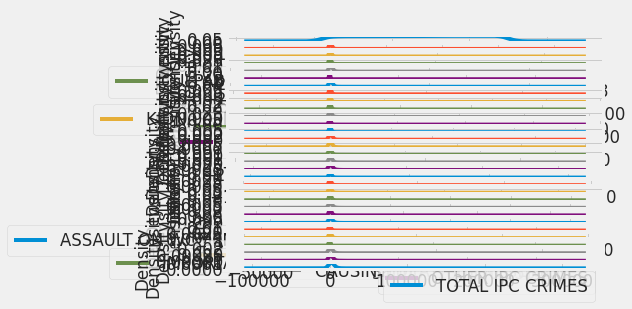

In [ ]:
data_1.plot(kind='density',subplots=True,sharex=False)
plt.show()

In [ ]:
data_38=pd.read_csv('38_Unidentified_dead_bodies_recovered_and_inquest_conducted.csv')
data_38

,Area_Name,Year,Unidentified_Dead_bodies_Recovered_Inquest_Conducted
0,Andhra Pradesh,2001,5290
1,Arunachal Pradesh,2001,0
2,Assam,2001,14
3,Bihar,2001,1438
4,Chandigarh,2001,18
...,...,...,...
309,Tamil Nadu,2010,2795
310,Tripura,2010,17
311,Uttar Pradesh,2010,3767
312,Uttarakhand,2010,364


In [ ]:
udb=data_38[data_38.Unidentified_Dead_bodies_Recovered_Inquest_Conducted>0].Unidentified_Dead_bodies_Recovered_Inquest_Conducted
yr_fr=data_38["Year"]
bodies_mean,bodies_std=udb.mean(),udb.std()
udb,yr_fr

(0      5290
 2        14
 3      1438
 4        18
 5       114
        ... 
 309    2795
 310      17
 311    3767
 312     364
 313    3461
 Name: Unidentified_Dead_bodies_Recovered_Inquest_Conducted, Length: 302, dtype: int64,
 0      2001
 1      2001
 2      2001
 3      2001
 4      2001
        ... 
 309    2010
 310    2010
 311    2010
 312    2010
 313    2010
 Name: Year, Length: 314, dtype: int64)

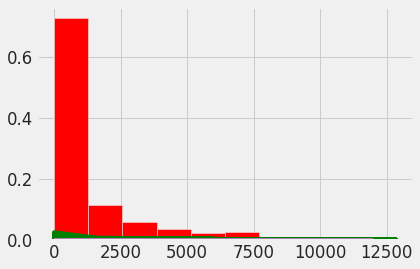

In [ ]:
udb.hist(color='red', weights = np.zeros_like(udb) + 1.0 / udb.count())
udb.value_counts(sort=False, normalize=True).plot.line(color='green')
random_data = np.arange(1, 12000, 0.001)
pyplot.plot(random_data, stats.norm.pdf(random_data, bodies_mean, bodies_std), color='violet')

YEAR
2001    [[AxesSubplot(0.08,0.772;0.140323x0.108), Axes...
2002    [[AxesSubplot(0.08,0.772;0.140323x0.108), Axes...
2003    [[AxesSubplot(0.08,0.772;0.140323x0.108), Axes...
2004    [[AxesSubplot(0.08,0.772;0.140323x0.108), Axes...
2005    [[AxesSubplot(0.08,0.772;0.140323x0.108), Axes...
2006    [[AxesSubplot(0.08,0.772;0.140323x0.108), Axes...
2007    [[AxesSubplot(0.08,0.772;0.140323x0.108), Axes...
2008    [[AxesSubplot(0.08,0.772;0.140323x0.108), Axes...
2009    [[AxesSubplot(0.08,0.772;0.140323x0.108), Axes...
2010    [[AxesSubplot(0.08,0.772;0.140323x0.108), Axes...
2011    [[AxesSubplot(0.08,0.772;0.140323x0.108), Axes...
2012    [[AxesSubplot(0.08,0.772;0.140323x0.108), Axes...
dtype: object

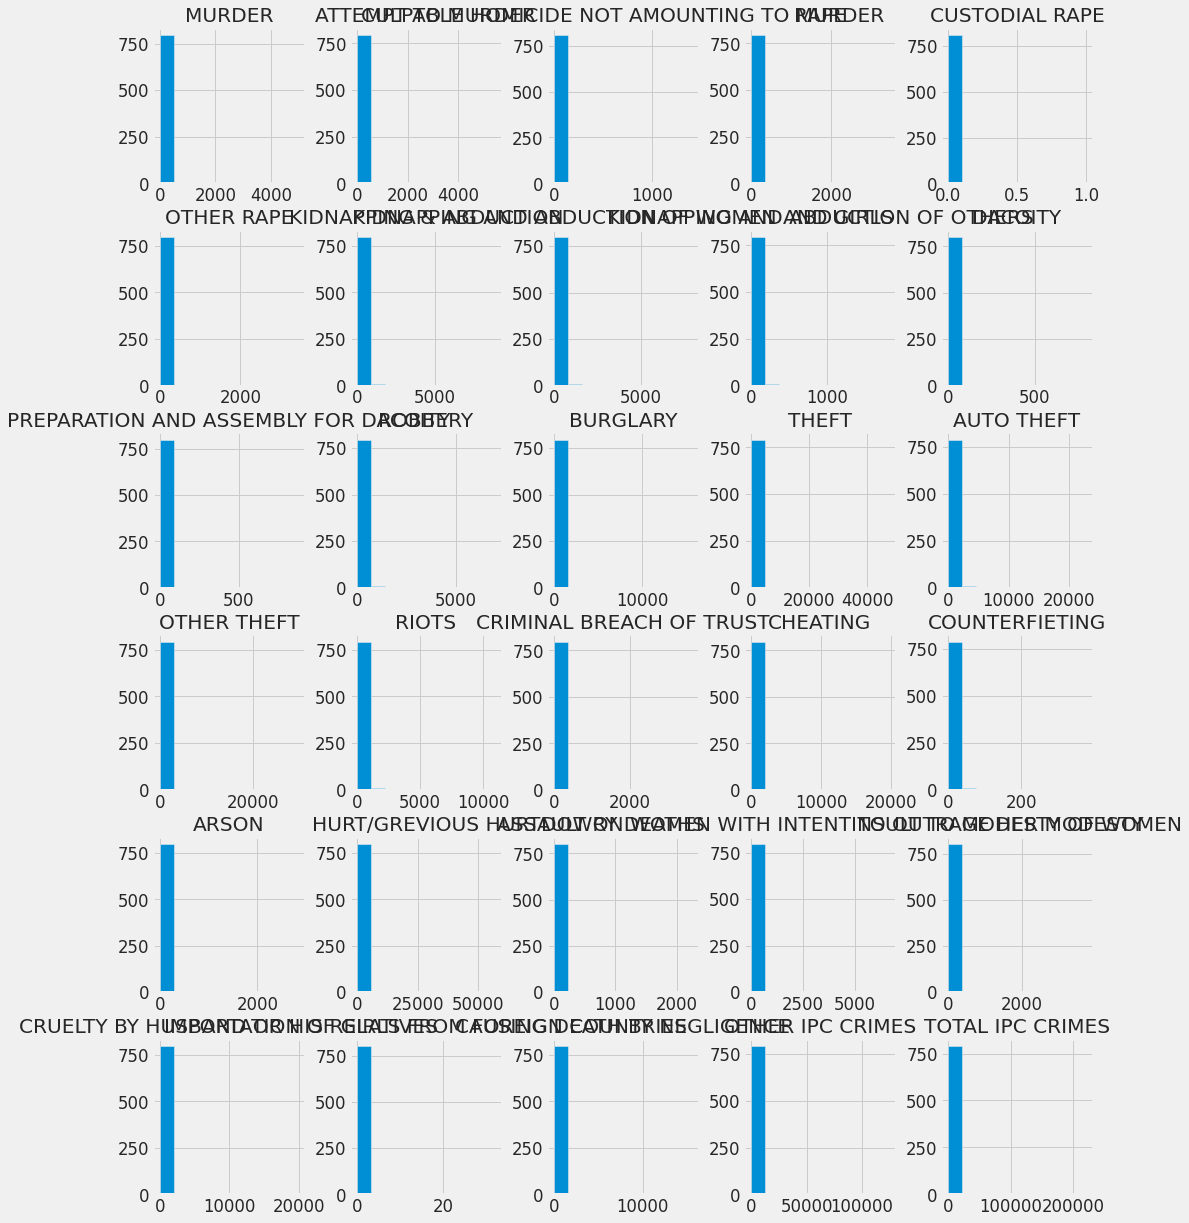

In [ ]:
import matplotlib.pyplot as plt
a = data_1.groupby('YEAR')
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
a.hist(ax = ax)

In [ ]:
victims = pd.read_csv('20_Victims_of_rape.csv')
police_hr = pd.read_csv('35_Human_rights_violation_by_police.csv')
auto_theft = pd.read_csv('30_Auto_theft.csv')
prop_theft = pd.read_csv('10_Property_stolen_and_recovered.csv')

In [ ]:
victims.head()

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
0,Andaman & Nicobar Islands,2001,Total Rape Victims,3,0,0,3,0,0,3,0
1,Andaman & Nicobar Islands,2001,Victims of Incest Rape,1,0,0,1,0,0,1,0
2,Andaman & Nicobar Islands,2001,Victims of Other Rape,2,0,0,2,0,0,2,0
3,Andaman & Nicobar Islands,2002,Total Rape Victims,2,0,0,1,1,0,2,0
4,Andaman & Nicobar Islands,2002,Victims of Incest Rape,0,0,0,0,0,0,0,0


In [ ]:
police_hr.Group_Name.value_counts()

HR_Total Violations by Police                 214
HR_Others Violations by Police                194
HR_Torture                                    190
HR_Disappearance of Persons                   190
HR_Extortion                                  190
HR_Atrocities on SC/ST                        188
HR_Illegal detention/arrests                  186
HR_Fake encounter killings                    185
HR_Indignity to Women                         185
HR_Violation against Terrorists/Extremists    182
HR_False implication                          182
HR_Failure in taking action                   181
Name: Group_Name, dtype: int64

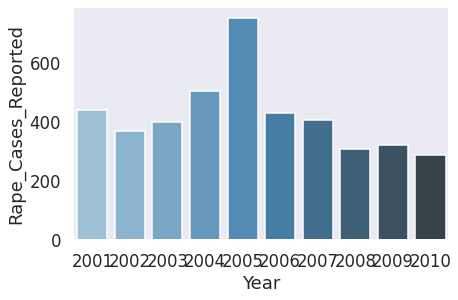

In [ ]:
inc_victims = victims[victims['Subgroup']=='Victims of Incest Rape']
g = pd.DataFrame(inc_victims.groupby(['Year'])['Rape_Cases_Reported'].sum().reset_index())

sns.barplot(x = 'Year',y = 'Rape_Cases_Reported',data = g,palette = 'Blues_d')


In [ ]:
data = pd.read_csv('20_Victims_of_rape.csv')
data.loc[(data['Rape_Cases_Reported'] != data['Victims_of_Rape_Total']),:].shape[0]


87

In [ ]:
data.loc[(data['Rape_Cases_Reported'] != data['Victims_of_Rape_Total']),:]

,Area_Name,Year,Subgroup,Rape_Cases_Reported,Victims_Above_50_Yrs,Victims_Between_10-14_Yrs,Victims_Between_14-18_Yrs,Victims_Between_18-30_Yrs,Victims_Between_30-50_Yrs,Victims_of_Rape_Total,Victims_Upto_10_Yrs
150,Chandigarh,2001,Total Rape Victims,18,0,8,4,4,3,19,0
152,Chandigarh,2001,Victims of Other Rape,16,0,8,4,2,3,17,0
270,Delhi,2001,Total Rape Victims,381,0,81,154,59,41,383,48
272,Delhi,2001,Victims of Other Rape,372,0,78,152,58,41,374,45
273,Delhi,2002,Total Rape Victims,403,0,54,52,217,49,407,35
...,...,...,...,...,...,...,...,...,...,...,...
920,Tamil Nadu,2007,Victims of Other Rape,521,1,41,88,346,35,530,19
927,Tamil Nadu,2010,Total Rape Victims,686,0,50,139,411,66,687,21
929,Tamil Nadu,2010,Victims of Other Rape,686,0,50,139,411,66,687,21
945,Tripura,2006,Total Rape Victims,189,1,4,34,135,17,191,0


In [ ]:
import matplotlib.style as style
data.loc[:,'Area_Name'].unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [ ]:
data.loc[:,'Subgroup'].unique()

array(['Total Rape Victims', 'Victims of Incest Rape',
       'Victims of Other Rape'], dtype=object)

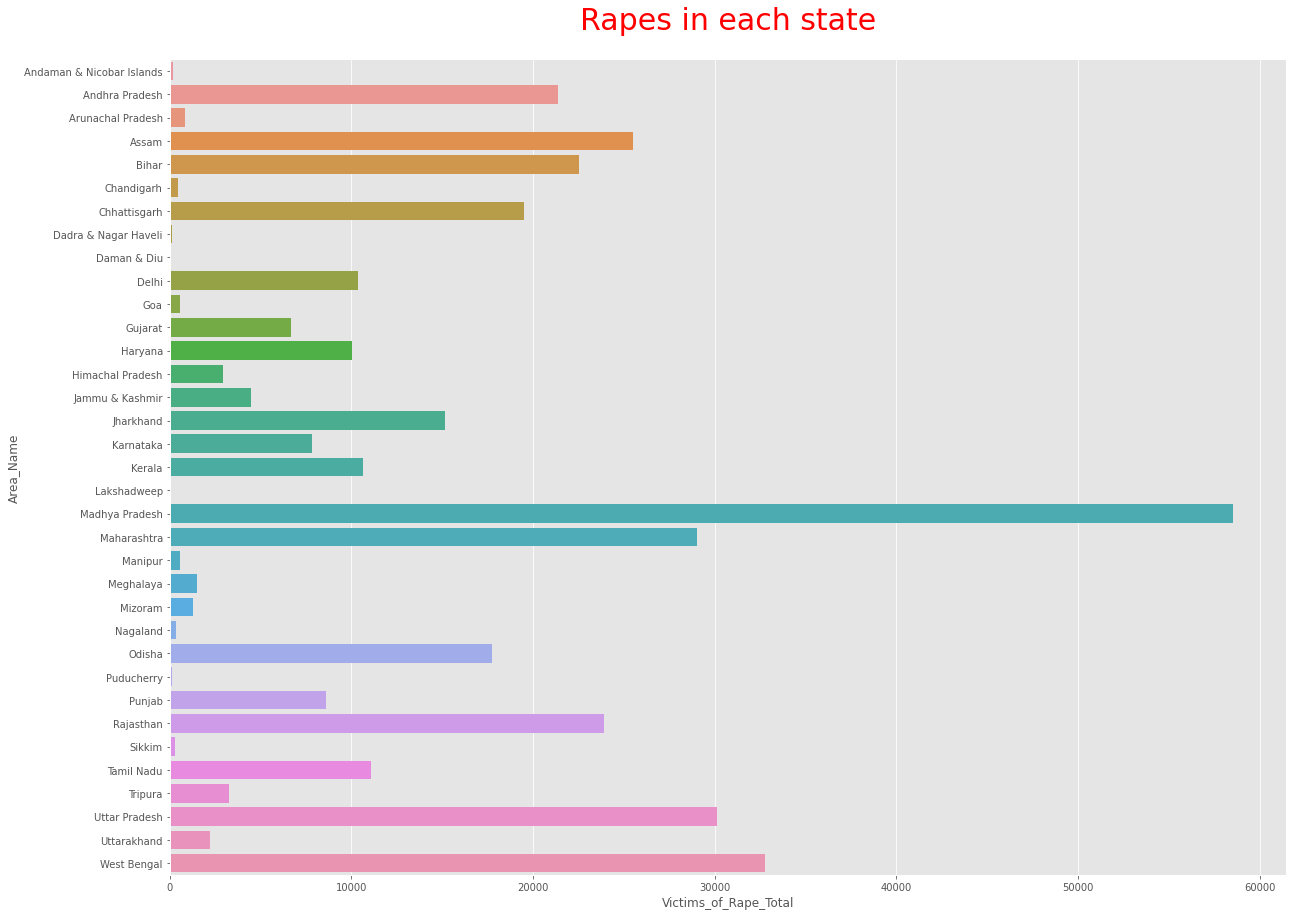

In [ ]:
## Q1. How many rape cases have been registered per state overall (for all years put together) ... Good way to visualize this would be horizontal bar graphs since showing this on 
##    conventional bar graphs may make the chart dirty !!! 

state_wise = data.pivot_table(values='Victims_of_Rape_Total',index = 'Area_Name',aggfunc='sum').reset_index()

style.use('ggplot')
plt.figure(figsize=(20, 15))


_ = sns.barplot(x = 'Victims_of_Rape_Total', y = 'Area_Name', data = state_wise,edgecolor = None)

_ = plt.title("Rapes in each state",fontdict={'fontsize':30},pad = 30, color = 'red')

In [ ]:
above_50 = inc_victims['Victims_Above_50_Yrs'].sum()
ten_to_14 = inc_victims['Victims_Between_10-14_Yrs'].sum()
fourteen_to_18 = inc_victims['Victims_Between_14-18_Yrs'].sum()
eighteen_to_30 = inc_victims['Victims_Between_18-30_Yrs'].sum()
thirty_to_50 = inc_victims['Victims_Between_30-50_Yrs'].sum()
upto_10 = inc_victims['Victims_Upto_10_Yrs'].sum()

age_grp = ['Upto 10','10 to 14','14 to 18','18 to 30','30 to 50','Above 50']
age_group_vals = [upto_10,ten_to_14,fourteen_to_18,eighteen_to_30,thirty_to_50,above_50]

fig = go.Figure(data=[go.Pie(labels=age_grp, values=age_group_vals,sort=False,
                            marker=dict(colors=px.colors.qualitative.G10),textfont_size=12)])

fig.show(renderer="colab")

In [ ]:
murder = pd.read_csv("32_Murder_victim_age_sex.csv")
murder.Year.unique()
murder.Area_Name.unique()
murder.Sub_Group_Name.unique()
murder.head(10)

,Area_Name,Year,Group_Name,Sub_Group_Name,Victims_Above_50_Yrs,Victims_Total,Victims_Upto_10_15_Yrs,Victims_Upto_10_Yrs,Victims_Upto_15_18_Yrs,Victims_Upto_18_30_Yrs,Victims_Upto_30_50_Yrs
0,Andaman & Nicobar Islands,2001,Murder - Female Victims,2. Female Victims,NaN,6,NaN,NaN,NaN,4.0,2.0
1,Andhra Pradesh,2001,Murder - Female Victims,2. Female Victims,67.0,607,15.0,38.0,43.0,269.0,175.0
2,Arunachal Pradesh,2001,Murder - Female Victims,2. Female Victims,2.0,16,0.0,0.0,0.0,10.0,4.0
3,Assam,2001,Murder - Female Victims,2. Female Victims,11.0,128,8.0,4.0,23.0,45.0,37.0
4,Bihar,2001,Murder - Female Victims,2. Female Victims,12.0,366,0.0,0.0,40.0,191.0,123.0
5,Chandigarh,2001,Murder - Female Victims,2. Female Victims,3.0,5,0.0,0.0,0.0,1.0,1.0
6,Chhattisgarh,2001,Murder - Female Victims,2. Female Victims,63.0,549,14.0,38.0,38.0,214.0,182.0
7,Delhi,2001,Murder - Female Victims,2. Female Victims,14.0,152,2.0,12.0,9.0,74.0,41.0
8,Goa,2001,Murder - Female Victims,2. Female Victims,1.0,13,NaN,NaN,NaN,4.0,8.0
9,Gujarat,2001,Murder - Female Victims,2. Female Victims,26.0,363,9.0,57.0,8.0,132.0,131.0


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 32_Murder_victim_age_sex.csv to 32_Murder_victim_age_sex.csv


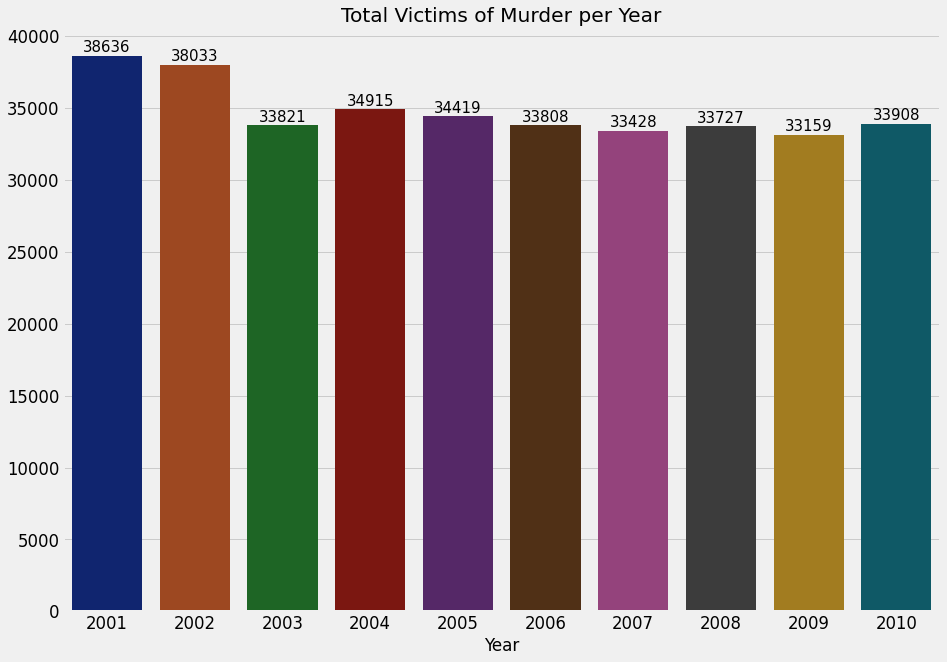

In [ ]:
murdert = murder[murder['Sub_Group_Name']== '3. Total']  #keeping only total category of subgroup
murdery = murdert.groupby(['Year'])['Victims_Total'].sum().reset_index() #grouping
sns.set_context("talk")
plt.style.use("fivethirtyeight")
plt.figure(figsize = (14,10))
#sns.palplot(sns.color_palette("hls", 8))
ax = sns.barplot(x = 'Year' , y = 'Victims_Total' , data = murdery ,palette= 'dark') #plotting bar graph
plt.title("Total Victims of Murder per Year")
ax.set_ylabel('')
for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Indian_States.dbf to Indian_States (1).dbf
Saving Indian_States.prj to Indian_States (1).prj
Saving Indian_States.shp to Indian_States (3).shp
Saving Indian_States.shx to Indian_States.shx


In [ ]:
murderst = murder[murder['Sub_Group_Name']== '3. Total']   #we need only total number of victims per state
murderst= murderst.groupby(['Area_Name'])['Victims_Total'].sum().sort_values(ascending = False).reset_index()
new_row = {'Area_Name':'Telangana', 'Victims_Total':27481}
murderst = murderst.append(new_row , ignore_index=True )
murderst.sort_values('Area_Name')
import geopandas as gpd
gdf = gpd.read_file('Indian_States.shp')
murderst.at[17, 'Area_Name'] = 'NCT of Delhi'
merged = gdf.merge(murderst, left_on='st_nm', right_on='Area_Name')
merged.drop(['Area_Name'], axis=1)
#merged.describe()

,st_nm,geometry,Victims_Total
0,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",12761
1,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",34675
2,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",202
3,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",10787
4,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",53
5,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",412
6,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...",12757
7,Haryana,"POLYGON ((76.85065 30.87512, 76.86594 30.86691...",8793
8,Himachal Pradesh,"POLYGON ((76.79634 33.25490, 76.80351 33.25275...",1269
9,Jammu & Kashmir,"POLYGON ((74.73451 37.02068, 74.73647 37.01937...",7339


In [ ]:
pip install pysal


     |████████████████████████████████| 2.4MB 38.1MB/s 
     |████████████████████████████████| 112kB 50.3MB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 92kB 6.6MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 215kB 40.4MB/s 
     |████████████████████████████████| 5.7MB 39.2MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 153kB 44.4MB/s 
     |████████████████████████████████| 235kB 45.9MB/s 
     |████████████████████████████████| 235kB 47.6MB/s 
     |████████████████████████████████| 56.4MB 78kB/s 
     |████████████████████████████████| 1.0MB 35.9MB/s 
     |████████████████████████████████| 19.1MB 261kB/s 
     |████████████████████████████████| 2.1MB 41.6MB/s 
     |████████████████████████████████| 40.6MB 114kB/s 
     

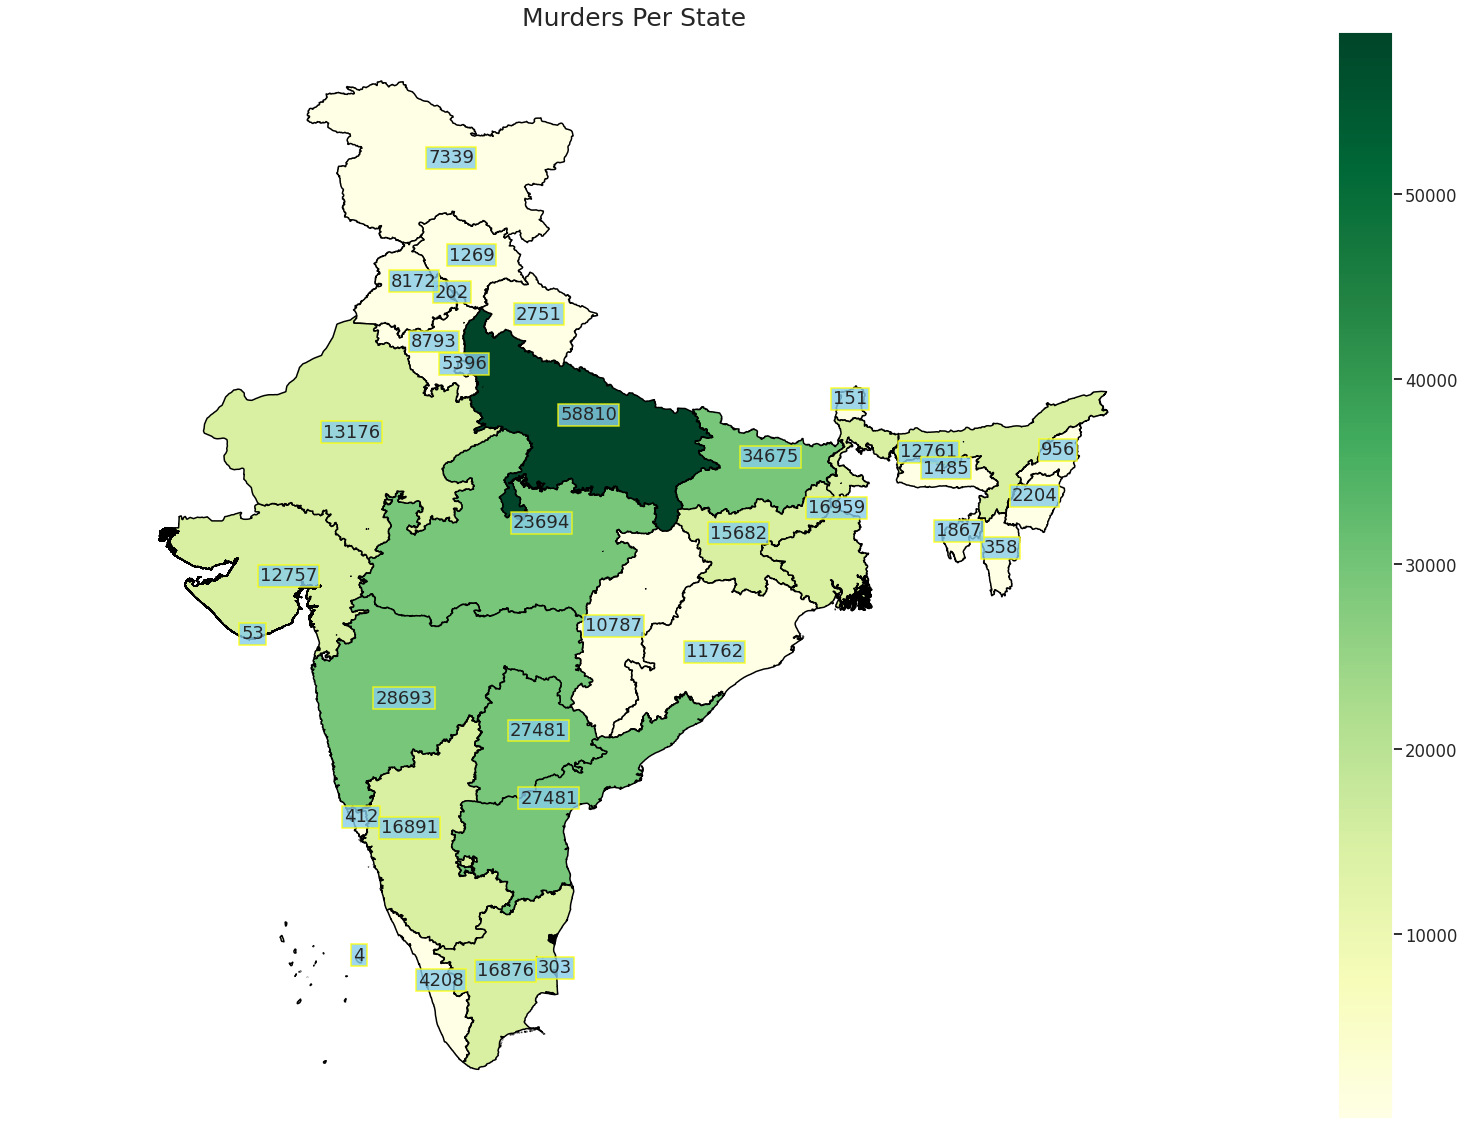

In [ ]:
from matplotlib import cm
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]


sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('dark_background')
cmap = 'YlGn'
figsize = (25, 20)

ax = merged.dropna().plot(column= 'Victims_Total', cmap=cmap, figsize=figsize, scheme='equal_interval',edgecolor='black')


for idx, row in merged.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Victims_Total'], horizontalalignment='center', bbox={'facecolor': 'skyblue', 'alpha':0.8, 'pad': 2, 'edgecolor':'yellow'})


ax.set_title("Murders Per State", size = 25)

norm = matplotlib.colors.Normalize(vmin=merged['Victims_Total'].min(), vmax= merged['Victims_Total'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

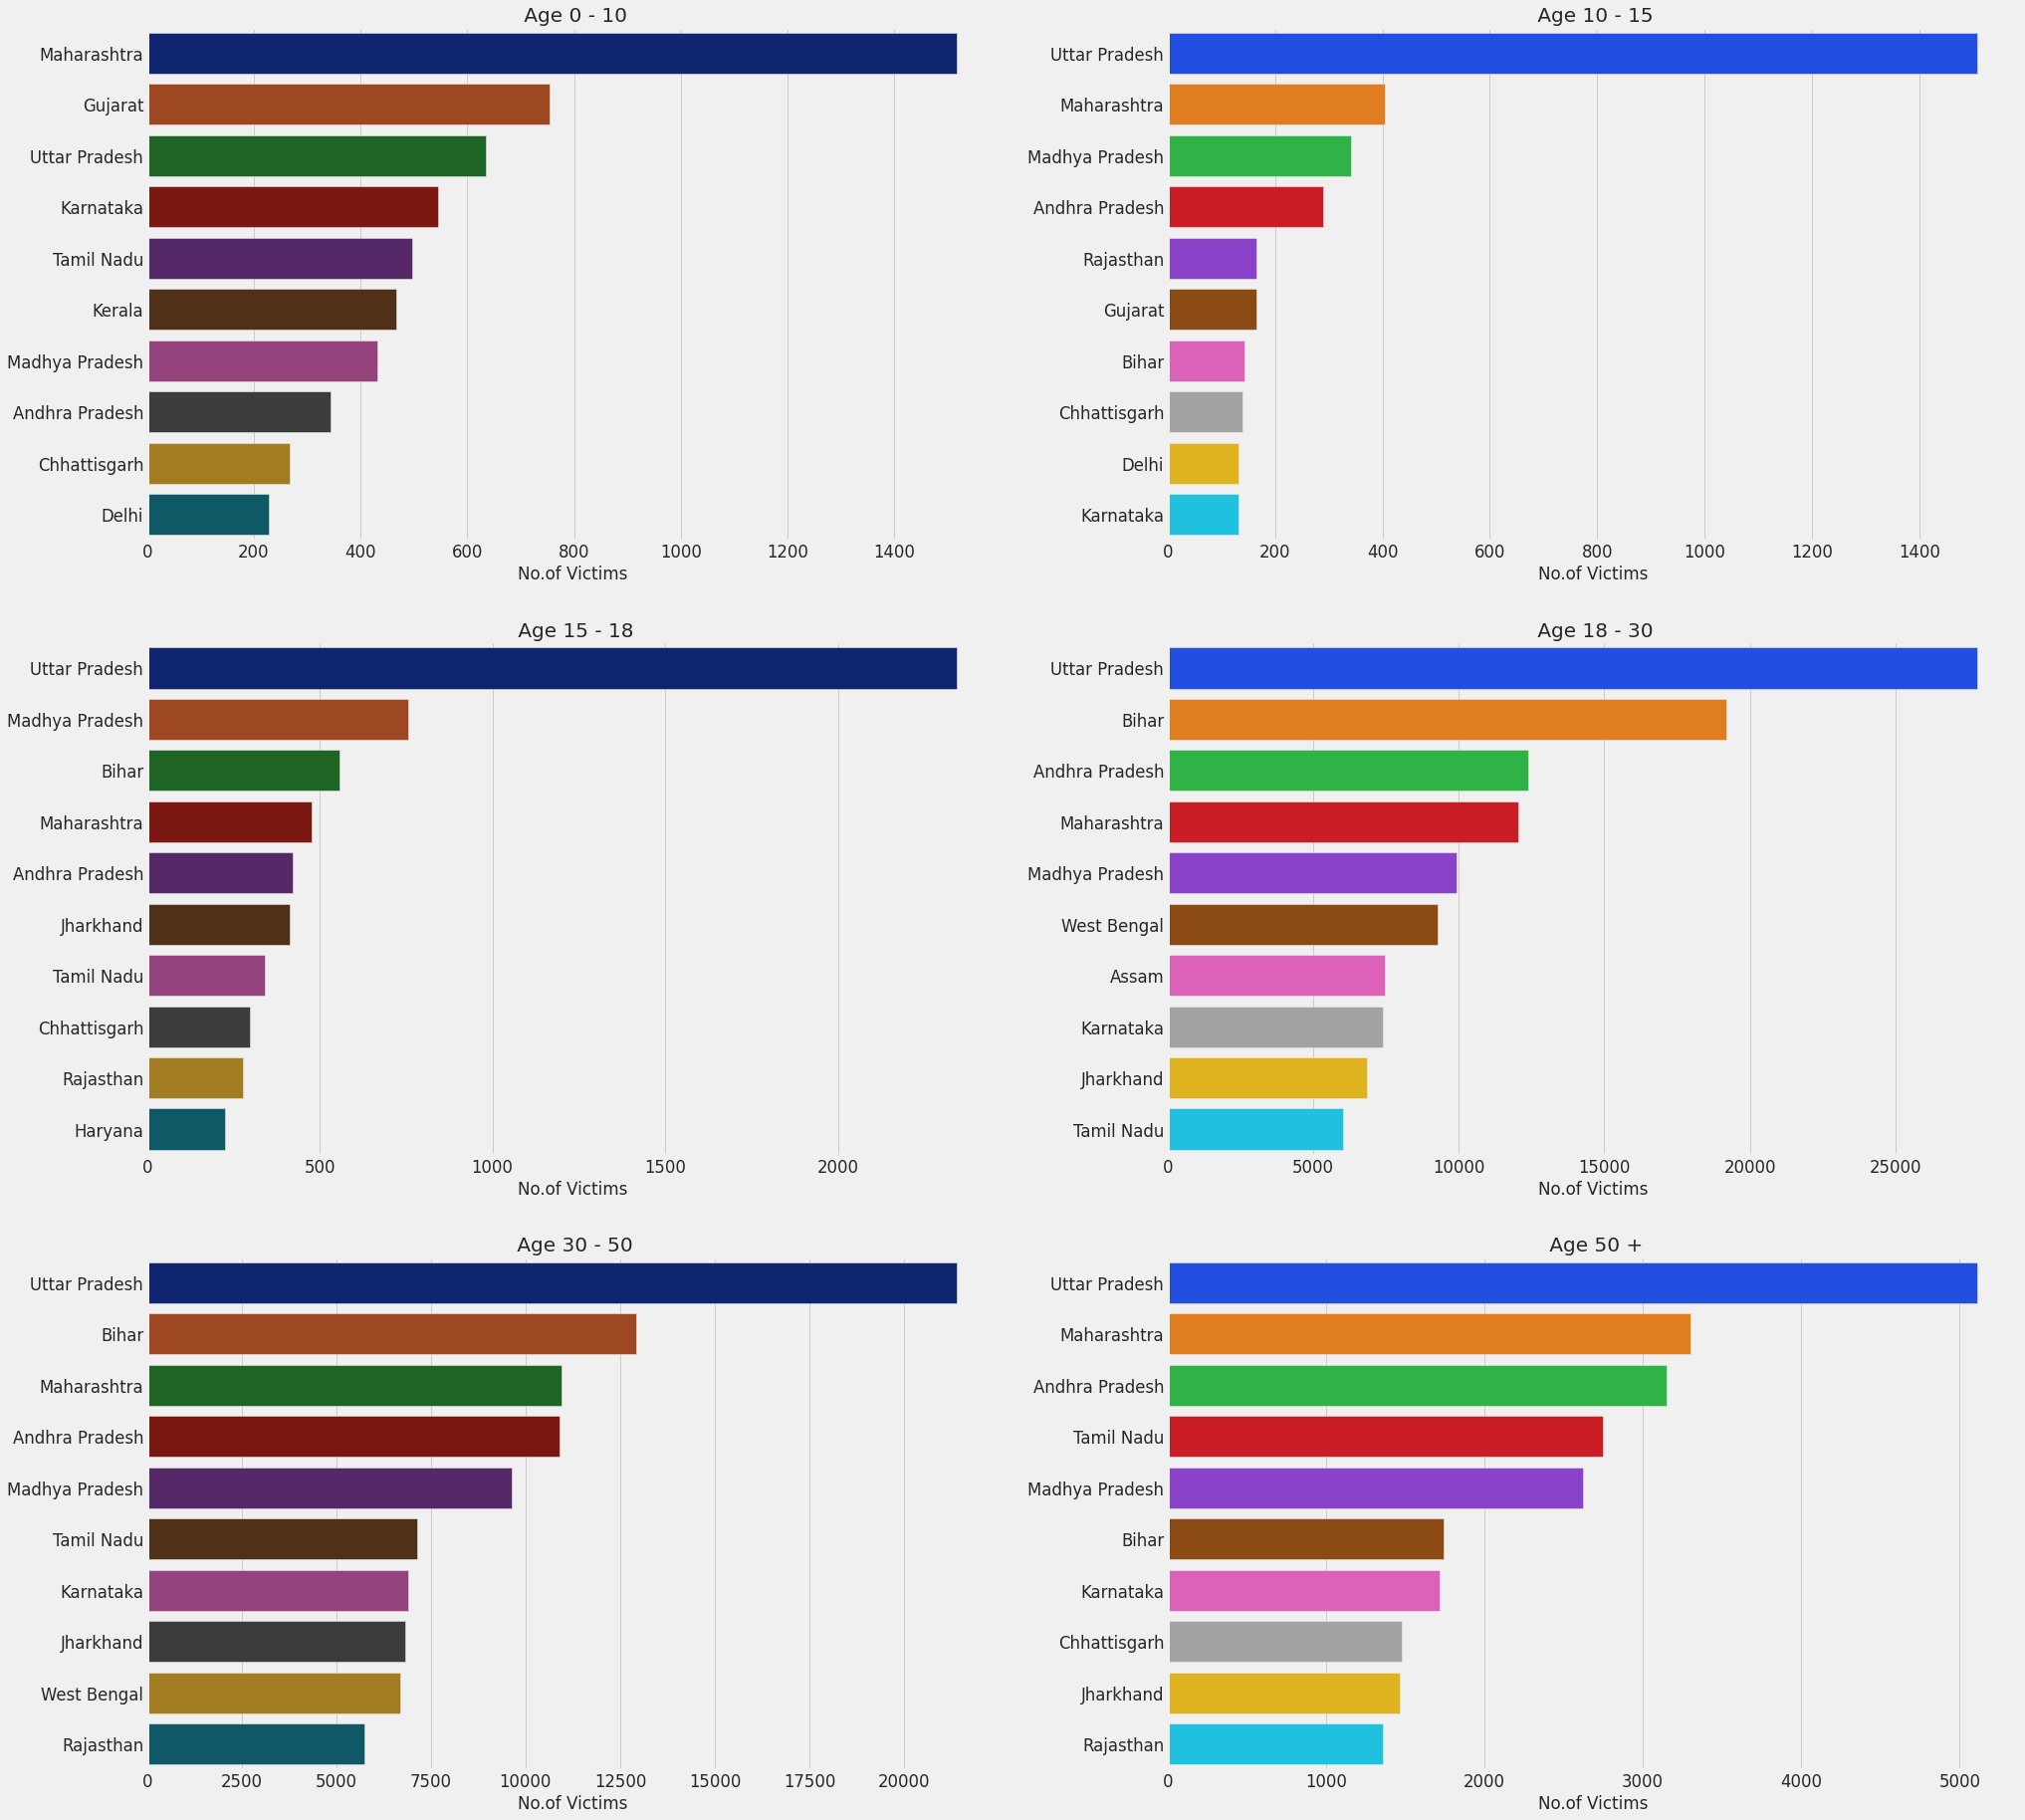

<Figure size 1008x1080 with 0 Axes>

In [ ]:
murdernt = murder[murder['Sub_Group_Name']== '3. Total']
murdersa = murdernt.groupby(['Area_Name'])['Victims_Upto_10_15_Yrs','Victims_Above_50_Yrs', 
                                           'Victims_Upto_10_Yrs', 'Victims_Upto_15_18_Yrs',
                                           'Victims_Upto_18_30_Yrs','Victims_Upto_30_50_Yrs',].sum().reset_index() #grouping with state and age group
murdersa = murdersa.melt('Area_Name', var_name='AgeGroup',  value_name='vals') #melting the dataset

sns.set_style("darkgrid")
sns.set_context("talk")
plt.style.use("fivethirtyeight")


f, axes = plt.subplots(3,2, figsize = (30,30))
plt.figure(figsize = (14,15))
sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Upto_10_Yrs'].sort_values(by=['vals'],ascending = False).head(10),ax = axes[0,0],palette= 'dark')
axes[0,0].set_title(' Age 0 - 10', size = 20)
axes[0,0].set_ylabel('')
axes[0,0].set_xlabel('No.of Victims')

sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Upto_10_15_Yrs'].sort_values(by=['vals'],ascending = False).head(10), ax = axes[0,1],palette= 'bright' )
axes[0,1].set_title(' Age 10 - 15', size = 20)
axes[0,1].set_ylabel('')
axes[0,1].set_xlabel('No.of Victims') 


sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Upto_15_18_Yrs'].sort_values(by=['vals'],ascending = False).head(10),ax = axes[1,0],palette= 'dark')
axes[1,0].set_title(' Age 15 - 18', size = 20)
axes[1,0].set_ylabel('')
axes[1,0].set_xlabel('No.of Victims')  

sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Upto_18_30_Yrs'].sort_values(by=['vals'],ascending = False).head(10), ax = axes[1,1],palette= 'bright' )
axes[1,1].set_title(' Age 18 - 30', size = 20)
axes[1,1].set_ylabel('')
axes[1,1].set_xlabel('No.of Victims')  

sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Upto_30_50_Yrs'].sort_values(by=['vals'],ascending = False).head(10), ax = axes[2,0],palette= 'dark')
axes[2,0].set_title(' Age 30 - 50', size = 20)
axes[2,0].set_ylabel('')
axes[2,0].set_xlabel('No.of Victims')  

sns.barplot(x = 'vals', y = 'Area_Name', data = murdersa[murdersa['AgeGroup']== 'Victims_Above_50_Yrs'].sort_values(by=['vals'],ascending = False).head(10),ax = axes[2,1],palette= 'bright')
axes[2,1].set_title(' Age 50 +', size = 20)
axes[2,1].set_ylabel('')
axes[2,1].set_xlabel('No.of Victims')  
plt.tight_layout()

In [ ]:
g3 = pd.DataFrame(police_hr.groupby(['Year'])['Cases_Registered_under_Human_Rights_Violations'].sum().reset_index())
g3.columns = ['Year','Cases Registered']

fig = px.bar(g3,x='Year',y='Cases Registered',color_discrete_sequence=['green'])
fig.show(renderer="colab")

In [ ]:
g5 = pd.DataFrame(auto_theft.groupby(['Year'])['Auto_Theft_Stolen'].sum().reset_index())

g5.columns = ['Year','Vehicles Stolen']

fig = px.bar(g5,x='Year',y='Vehicles Stolen',color_discrete_sequence=['#17becf'])
fig.show(renderer="colab")

In [ ]:
vehicle_list = ['Motor Cycles/ Scooters','Motor Car/Taxi/Jeep','Buses',
               'Goods carrying vehicles (Trucks/Tempo etc)','Other Motor vehicles']

sr_no = [1,2,3,4,5]

fig = go.Figure(data=[go.Table(header=dict(values=['Sr No','Vehicle type'],
                                          fill_color='turquoise',
                                           height=30),
                 cells=dict(values=[sr_no,vehicle_list],
                            height=30))
                     ])
fig.show(renderer="colab")

In [ ]:
g4 = pd.DataFrame(police_hr.groupby(['Year'])['Policemen_Chargesheeted','Policemen_Convicted'].sum().reset_index())

year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']

fig = go.Figure(data=[
    go.Bar(name='Policemen Chargesheeted', x=year, y=g4['Policemen_Chargesheeted'],
           marker_color='purple'),
    go.Bar(name='Policemen Convicted', x=year, y=g4['Policemen_Convicted'],
          marker_color='red')
])

fig.update_layout(barmode='group',xaxis_title='Year',yaxis_title='Number of policemen')
fig.show(renderer="colab")

In [ ]:
auto_theft_traced = auto_theft['Auto_Theft_Coordinated/Traced'].sum()
auto_theft_recovered = auto_theft['Auto_Theft_Recovered'].sum()
auto_theft_stolen = auto_theft['Auto_Theft_Stolen'].sum()

vehicle_group = ['Vehicles Stolen','Vehicles Traced','Vehicles Recovered']
vehicle_vals = [auto_theft_stolen,auto_theft_traced,auto_theft_recovered]

colors = ['crimson','gold','green']

fig = go.Figure(data=[go.Pie(labels=vehicle_group, values=vehicle_vals,sort=False, marker=dict(colors=colors),textfont_size=12)])

fig.show(renderer="colab")

In [ ]:
motor_c = auto_theft[auto_theft['Sub_Group_Name']=='1. Motor Cycles/ Scooters']

g8 = pd.DataFrame(motor_c.groupby(['Area_Name'])['Auto_Theft_Stolen'].sum().reset_index())
g8_sorted = g8.sort_values(['Auto_Theft_Stolen'],ascending=True)
fig = px.bar(g8_sorted.iloc[-10:,:], y='Area_Name', x='Auto_Theft_Stolen',
             orientation='h',color_discrete_sequence=['#008080'])
fig.show(renderer="colab")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving India_boundary.dbf to India_boundary.dbf
Saving India_boundary.prj to India_boundary.prj
Saving India_boundary.shp to India_boundary.shp


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving India_boundary.shx to India_boundary.shx
Saving Indian_states.dbf to Indian_states.dbf
Saving Indian_states.prj to Indian_states.prj
Saving Indian_states.shp to Indian_states.shp
Saving Indian_states.shx to Indian_states.shx


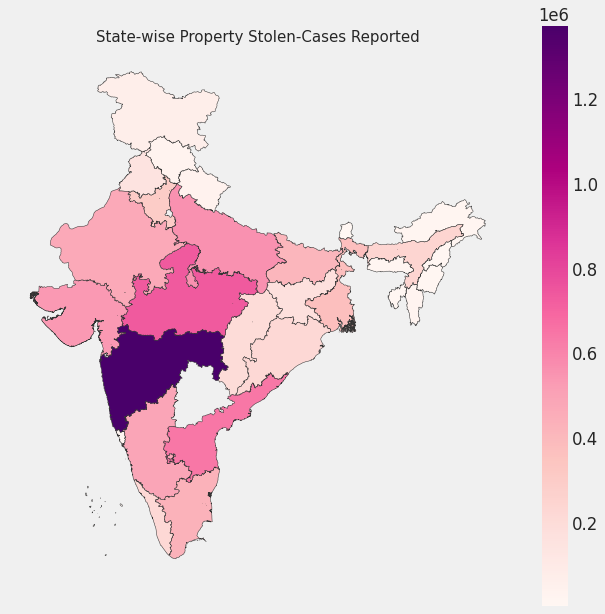

In [ ]:
g7 = pd.DataFrame(prop_theft.groupby(['Area_Name'])['Cases_Property_Stolen'].sum().reset_index())
g7.columns = ['State/UT','Cases Reported']
g7.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

shp_gdf = gpd.read_file('Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g7.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Property Stolen-Cases Reported',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Cases Reported', cmap='RdPu', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

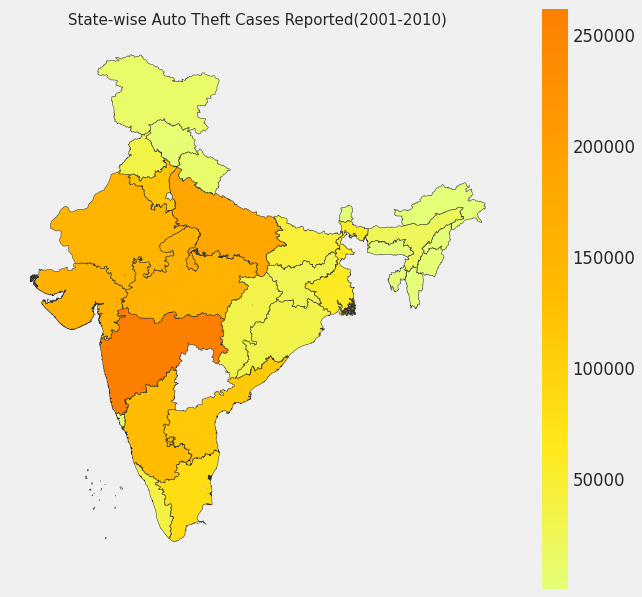

In [ ]:
g5 = pd.DataFrame(auto_theft.groupby(['Area_Name'])['Auto_Theft_Stolen'].sum().reset_index())
g5.columns = ['State/UT','Vehicle_Stolen']
g5.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

shp_gdf = gpd.read_file('Indian_states.shp')
merged = shp_gdf.set_index('st_nm').join(g5.set_index('State/UT'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Auto Theft Cases Reported(2001-2010)',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Vehicle_Stolen', cmap='Wistia', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

In [ ]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2693755" data-url="https://flo.uri.sh/visualisation/2693755/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

In [ ]:
murdery.head()

NameError: ignored